In [33]:
!pip install flake8 pycodestyle_magic
!pip install matplotlib-inline


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

In [6]:
def f(n, m, a):
    total = 1
    for c in range(1, a+1):
        first = 1
        for j in range(1, m+1):
            s = 0
            for i in range(1, n+1):
                s += (28*c**2)**6 / 5 + 16 * (j**3 / 44 + i**2)**5
            first *= s
        total *= first
    return total


print(f(4, 2, 8))


8.902039764152575e+247


In [7]:
Y = [1, 0.5, 1]
Z = [0.5, 2, 1]


def d1(y: list, z: list):
    if len(y) != len(z):
        return None

    total = 0
    for i in range(len(y)):
        total += (y[i]-z[i])**2

    return total**0.5


d1(Y, Z)


1.5811388300841898

In [8]:
def d2(y: list, z: list):
    if len(y) != len(z):
        return None

    total = 0
    for i in range(len(y)):
        total += (abs(y[i]-z[i]))

    return total


d2(Y, Z)


2.0

In [9]:
def d3(y: list, z: list):
    total_vect = []
    if len(y) != len(z):
        return None

    for i in range(len(y)):
        total_vect.append(abs(y[i]-z[i]))

    max_total = 0
    for i in range(len(total_vect)):
        if total_vect[i] > max_total:
            max_total = total_vect[i]
    return max_total


d3(Y, Z)


1.5

In [10]:
def d4(y: list, z: list):
    if len(y) != len(z):
        return None

    total = 0
    for i in range(len(y)):
        total += (y[i]-z[i])**2

    return total


d4(Y, Z)


2.5

In [11]:
def d5(y: list, z: list, h=5):
    if len(y) != len(z):
        return None

    total = 0
    for i in range(len(y)):
        total += abs(y[i]-z[i])**h

    return total**(1/h)


d5(Y, Z)


1.5012325406940918

In [12]:
import matplotlib.pyplot as plt

def visualize(distance_metrics, y, z, move=1):
    moved_z = [i + move for i in z]
    distance_differences = []
    for distance in distance_metrics:
        distance_before_move = distance(y, z)
        distance_after_move = distance(y, moved_z)
        distance_difference = distance_after_move - distance_before_move
        distance_differences.append(distance_difference)
    x = range(0, len(distance_differences))
    figure, axis = plt.subplots()
    # Построение гистограммы с подписями.
    axis.bar(x, distance_differences)
    axis.set_xticks(x, labels=[f'd_{i + 1}' for i in x])
    # для тех, кто работает в средах, отличных от jupyter-подобных - раскомментировать строку ниже
    # plt.show()


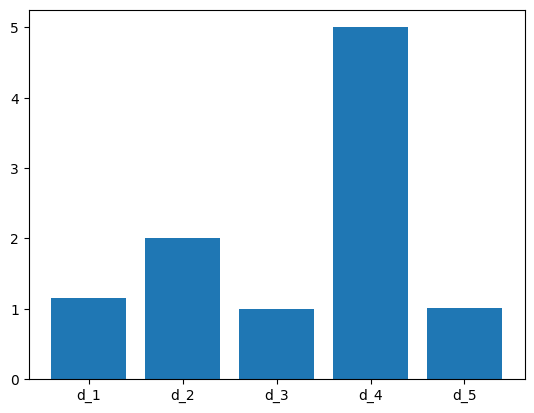

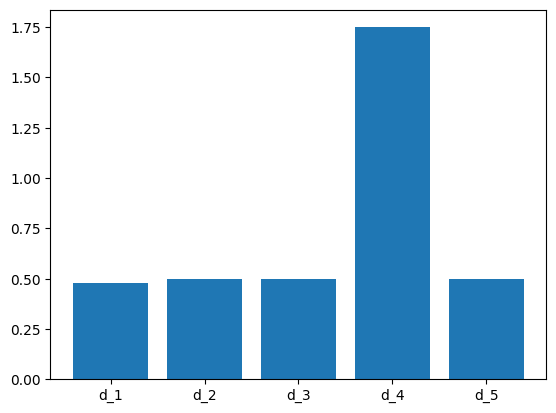

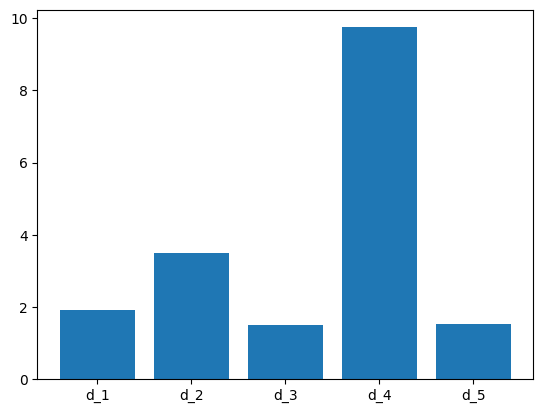

In [13]:
visualize([d1, d2, d3, d4, d5], Y, Z, move=1)
visualize([d1, d2, d3, d4, d5], Y, Z, move=0.5)
visualize([d1, d2, d3, d4, d5], Y, Z, move=1.5)


In [14]:
words = ["language!", "programming", "Python", "the", "love", "I"]


def rev(words: list[str]):
    return " ".join(words[::-1])


s = rev(words)


In [15]:
def f(s, c):
    s_clean = s.replace(" ", "").lower()
    return s_clean.count(c.lower())


def count_characters(s):
    s_clean = s.replace(" ", "").lower()
    unique_chars = set(s_clean)
    result = {}
    for ch in unique_chars:
        result[ch] = f(s, ch)
    return result


count_characters(s)


{'!': 1,
 'v': 1,
 'r': 2,
 'a': 3,
 'm': 2,
 'u': 1,
 'h': 2,
 'l': 2,
 'n': 3,
 'g': 4,
 'y': 1,
 'o': 3,
 'i': 2,
 'p': 2,
 'e': 3,
 't': 2}

In [16]:
def levenshtein(a, b):
    """
    Возвращает расстояние Левенштейна между строками a и b.
    """
    n, m = len(a), len(b)
    # dp[i][j] будет хранить расстояние между a[:i] и b[:j]
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    # Инициализация базовых случаев
    for i in range(n + 1):
        dp[i][0] = i
    for j in range(m + 1):
        dp[0][j] = j
    # Заполнение таблицы по рекуррентной формуле
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                # Символы совпадают, переносим предыдущее значение
                dp[i][j] = dp[i - 1][j - 1]
            else:
                # 1 + минимум из удаления, вставки, замены
                dp[i][j] = 1 + min(
                    dp[i][j - 1],     # вставка
                    dp[i - 1][j],     # удаление
                    dp[i - 1][j - 1]  # замена
                )
    return dp[n][m]


def main():
    pairs = [
        ("Hello, world!", "Goodbye, world!"),
        ("Hello, world!", "Bye, world!"),
        ("I love Python", "I like Python"),
        ("100101", "100011"),
    ]
    for s1, s2 in pairs:
        dist = levenshtein(s1, s2)
        return f"'{s1}' vs '{s2}' -> расстояние: {dist}"


main()
 

"'Hello, world!' vs 'Goodbye, world!' -> расстояние: 7"

In [17]:
import timeit
import random
import string


# Функция для генерации случайных строк.
def random_string(length):
    letters = string.ascii_lowercase
    return "".join(random.choice(letters)
                   for _ in range(length))


# Подготавливаем тестовые строки разной длины.
lengths = [10, 50, 100, 200]
results = {}


from Levenshtein import distance

for L in lengths:
    s1 = random_string(L)
    s2 = random_string(L)
    # Измеряем нашу реализацию.
    t_dp = timeit.timeit(lambda: levenshtein(s1, s2),
                         number=10)
    results[f"dp_{L}"] = t_dp
    # Пытаемся импортировать библиотечную реализацию.
    try:
        t_lib = timeit.timeit(lambda: distance(s1, s2),
                              number=10)
        results[f"lib_{L}"] = t_lib
    except ImportError:
        results[f"lib_{L}"] = None


print("Время работы (сек):")
for key in sorted(results.keys()):
    print(f"{key}: {results[key]}")


Время работы (сек):
dp_10: 0.0002158999559469521
dp_100: 0.015830099990125746
dp_200: 0.051462600007653236
dp_50: 0.00344920001225546
lib_10: 1.5300000086426735e-05
lib_100: 3.3100019209086895e-05
lib_200: 5.719996988773346e-05
lib_50: 9.700015652924776e-06
